In [10]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Adjusted base directory: 'S1'
DATA_DIR = Path("..") / "data"
FILE = DATA_DIR / "btc_usdc_1h.parquet"
print(FILE)
df = pd.read_parquet(FILE)
df['open_dt'] = pd.to_datetime(df['open_time'], unit='ms', utc=True)

print(f"Rows: {len(df):,} | From {df['open_dt'].min().date()} to {df['open_dt'].max().date()}")


../data/btc_usdc_1h.parquet
Rows: 8,760 | From 2024-05-03 to 2025-05-03


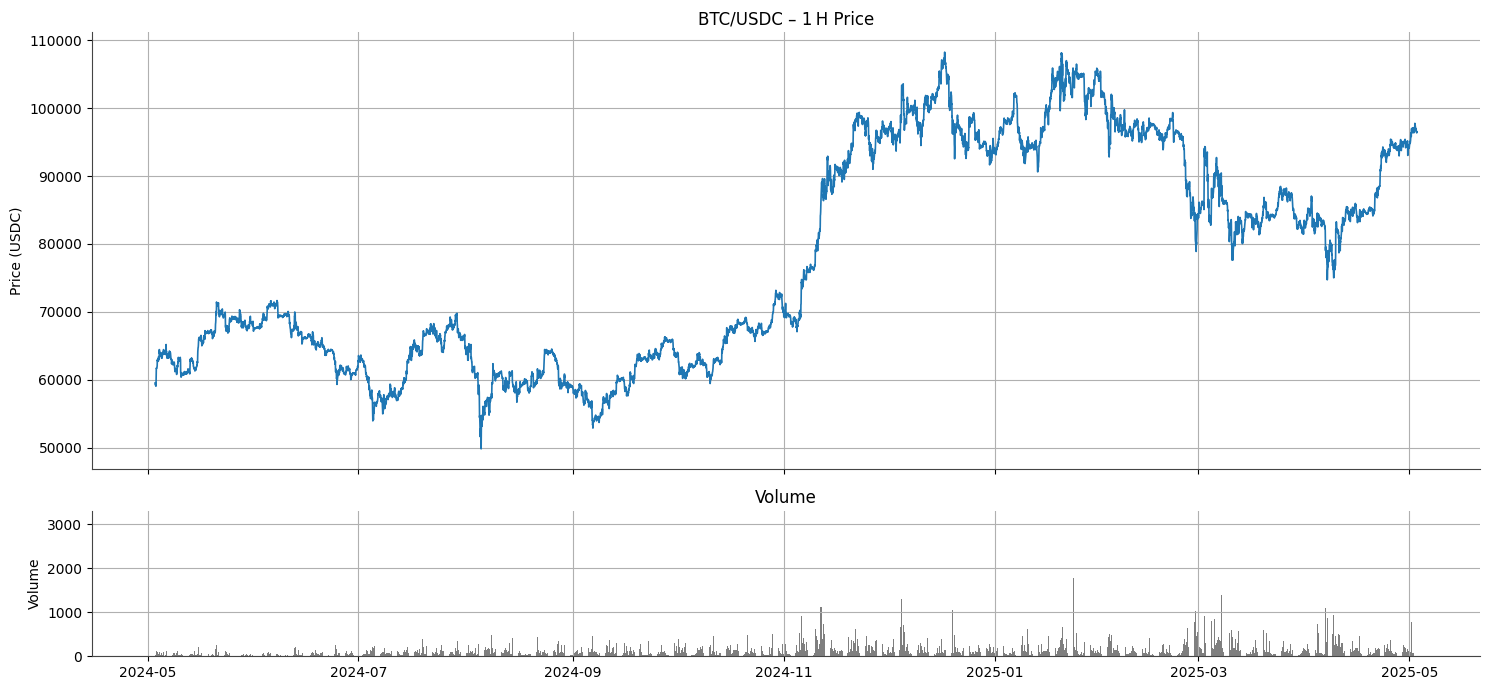

In [11]:
plt.style.use('default')
plt.rcParams.update({
    'figure.figsize': (15, 7),
    'axes.grid': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': '#444'
})

fig, (ax_price, ax_vol) = plt.subplots(2, 1, sharex=True, 
                                       gridspec_kw={'height_ratios': [3, 1]})

ax_price.plot(df['open_dt'], df['close'], color='#1f77b4', linewidth=1.2)
ax_price.set_ylabel("Price (USDC)")
ax_price.set_title("BTC/USDC – 1 H Price")

ax_vol.bar(df['open_dt'], df['volume'], width=0.03, color='#7f7f7f')
ax_vol.set_ylabel("Volume")
ax_vol.set_title("Volume")

fig.tight_layout()
plt.show()